# Goodreads
Владимир Кирилкин ПИ18-2

https://www.kaggle.com/jealousleopard/goodreadsbooks

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("books.csv", error_bad_lines = False)
data.head()

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [4]:
data.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [5]:
data.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


## Топ 20 книг по оценкам

In [6]:
top_books = data[data['ratings_count'] > 5000]
top_books = top_books.sort_values(by='average_rating', ascending=False).head(20)

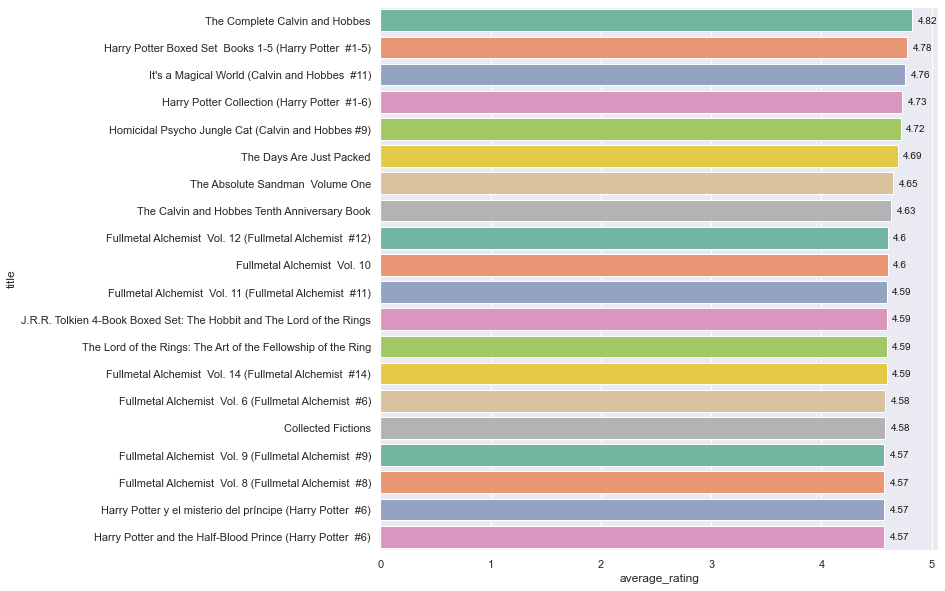

In [7]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))

color = sns.color_palette("Set2")
ax = sns.barplot(x="average_rating", y="title", data=top_books, palette=color)

for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.show()

## Топ 20 книг по количеству голосов

In [8]:
top_vote = data.sort_values(by='ratings_count', ascending=False).head(20)

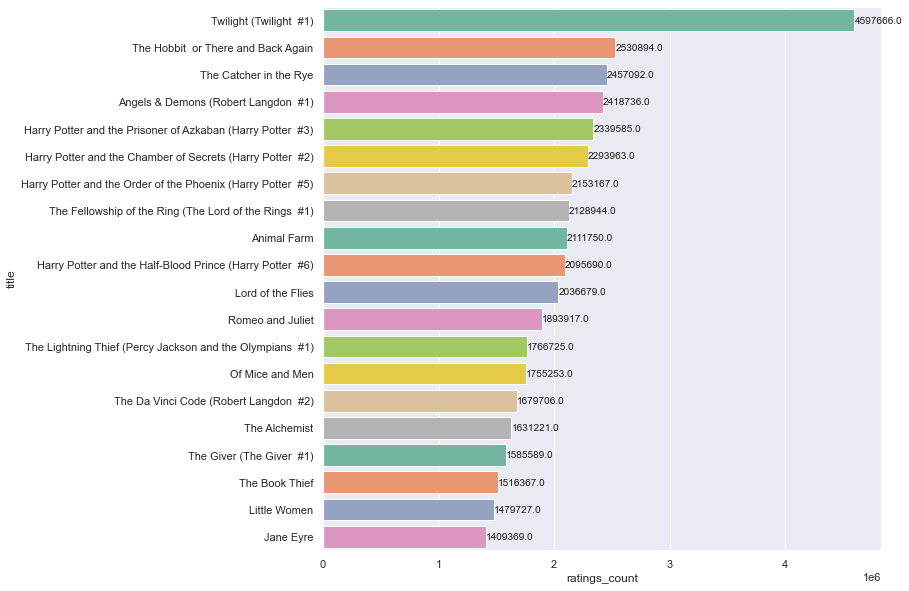

In [9]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))

color = sns.color_palette("Set2")
ax = sns.barplot(x="ratings_count", y="title", data=top_vote, palette=color)

for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.show()

## Отношения между количеством оценок и рейтингом

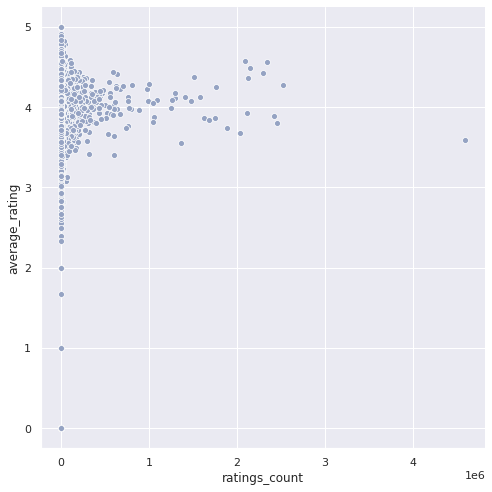

In [10]:
ax = sns.relplot(data=data, x="ratings_count", y="average_rating", color = '#95a3c3', sizes=(100, 200), height=7, marker='o')

In [14]:
new_data = data.copy()

In [15]:
new_data['only_author'] = new_data['authors'].apply(lambda x : x.split('/')[0])

In [19]:
total_rating = new_data.drop_duplicates(subset=['only_author', 'title'], keep='first')
total_rating = total_rating.groupby(by=['only_author']).agg({'average_rating': ['sum']})
total_rating.columns = ['total_rating']
total_rating.reset_index(inplace=True)
total_rating = total_rating.sort_values(by=['total_rating'], ascending=False)

In [18]:
total_book = new_data.groupby(by=['only_author']).agg({'title': ['nunique']})
total_book.columns = ['total_book']
total_book.reset_index(inplace=True)
total_book = total_book.sort_values(by=['total_book'], ascending=False)

In [20]:
avg_author = pd.merge(total_book, total_rating, on='only_author', how='outer')
avg_author['average_rating'] = round(avg_author['total_rating'] / avg_author['total_book'], 2)
avg_author = avg_author[avg_author['total_book'] > 26]
avg_author = avg_author.sort_values(by=['average_rating'], ascending=False)
avg_author

,only_author,total_book,total_rating,average_rating
4,J.R.R. Tolkien,41,172.22,4.20
7,Rumiko Takahashi,39,163.28,4.19
11,C.S. Lewis,32,134.02,4.19
2,P.G. Wodehouse,45,187.31,4.16
12,Terry Pratchett,31,127.55,4.11
9,Roald Dahl,35,141.66,4.05
6,Mercedes Lackey,40,160.11,4.00
18,Mark Twain,27,107.68,3.99
0,Stephen King,63,250.79,3.98
1,William Shakespeare,45,178.45,3.97


## Топ авторов по количеству книг

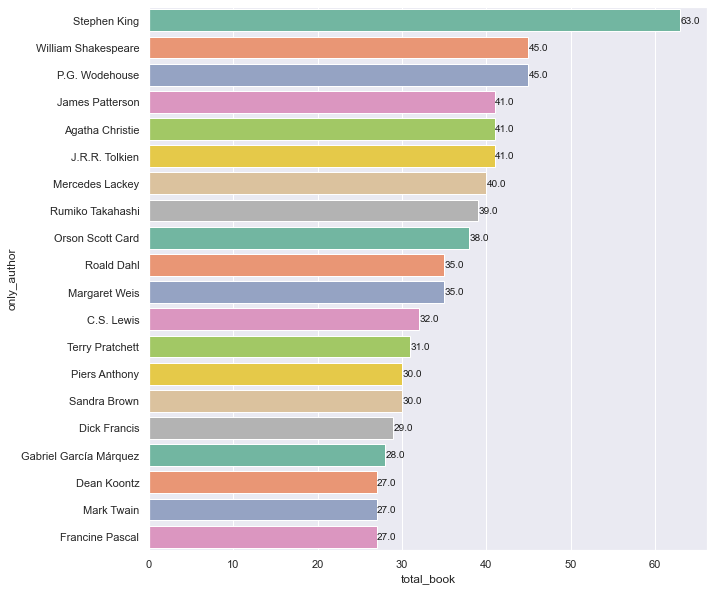

In [35]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))

color = sns.color_palette("Set2")
ax = sns.barplot(x="total_book", y="only_author", data=avg_author.sort_values(by="total_book", ascending=False), palette=color)

for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.show()

## Средняя оценка по автору

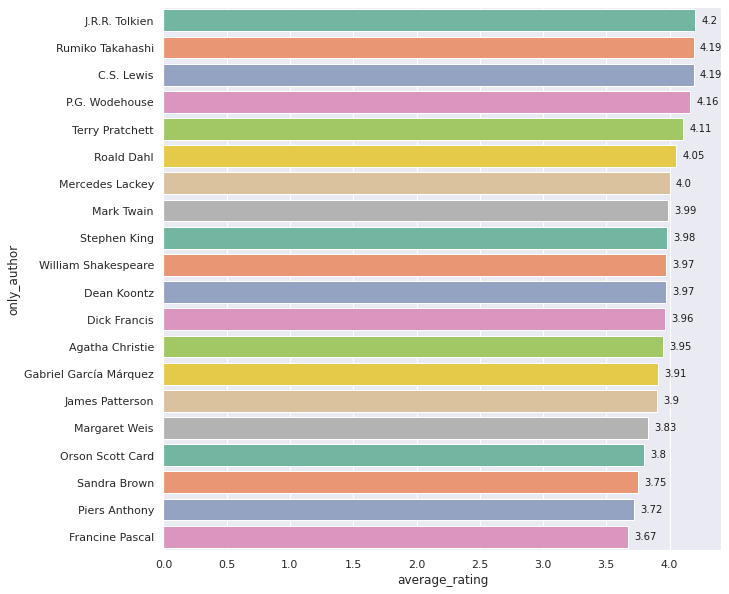

In [27]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))

color = sns.color_palette("Set2")
ax = sns.barplot(x="average_rating", y="only_author", data=avg_author, palette=color)

for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.show()

## Языки

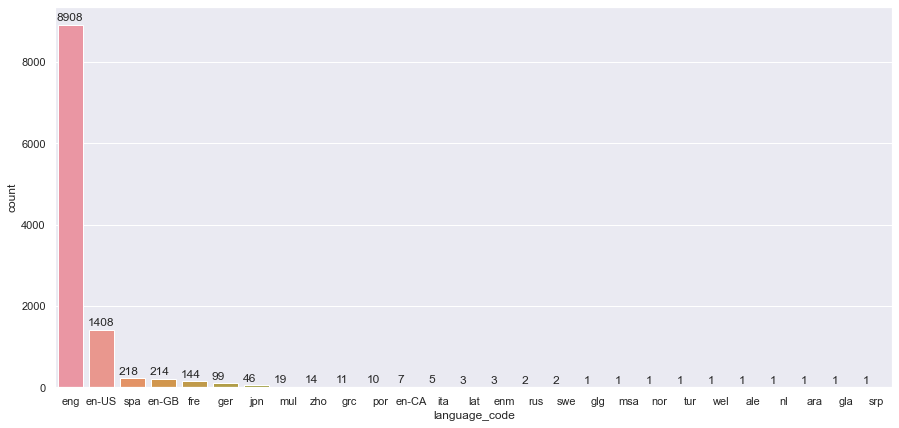

In [37]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(x=data.language_code, data=data, order=data.language_code.value_counts().index)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.05, p.get_height()+100))

## Топ 20 по количеству страниц

In [29]:
top_pages = data.sort_values(by='  num_pages', ascending=False).head(20)

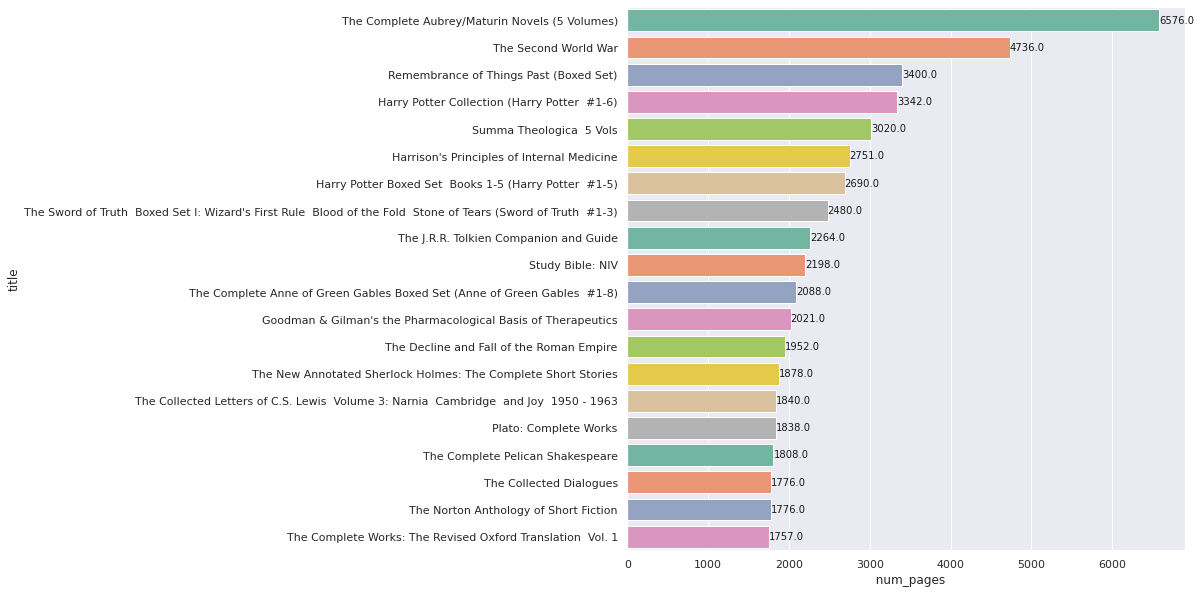

In [30]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))

color = sns.color_palette("Set2")
ax = sns.barplot(x="  num_pages", y="title", data=top_pages, palette=color)

for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.show()

## Отношения между количеством страниц и рейтингом

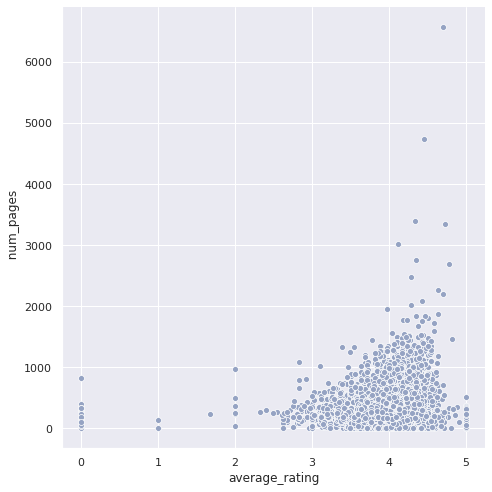

In [31]:
ax = sns.relplot(data=data, x="average_rating", y="  num_pages", color = '#95a3c3', sizes=(100, 200), height=7, marker='o')

## Отношения между количеством страниц и количеством оценок

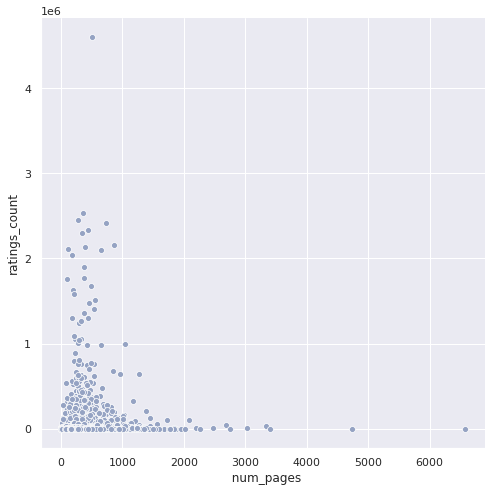

In [32]:
ax = sns.relplot(data=data, x="  num_pages", y="ratings_count", color = '#95a3c3', sizes=(100, 200), height=7, marker='o')

## Облако слов из заголовков

In [38]:
title_value = data.title.unique()

In [39]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

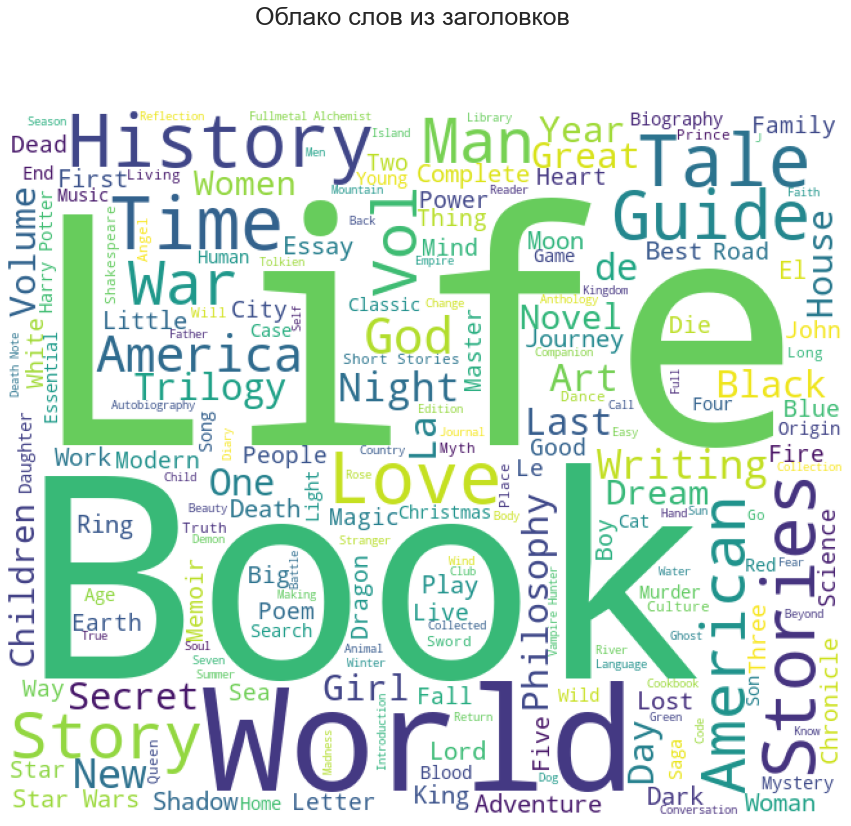

In [136]:
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                          background_color='#FFF',
                          width=650,
                          height=550,
                          stopwords=STOPWORDS,
                         ).generate(" ".join(title_value))
plt.imshow(wordcloud)
plt.axis('off')

plt.figtext(.5,.91,'Облако слов из заголовков', fontsize=25, ha='center')
plt.show()

Попробуем достать жанры для книг из api google books

In [125]:
import aiohttp
import asyncio

In [127]:
queue = data["isbn13"].to_list()
answ = {}

async def load(i):
    async with aiohttp.ClientSession() as session:
        while True:
            try:
                isbn = queue.pop()
                if i == 0:
                    print(len(queue))
            except IndexError:
                return
            async with session.get(f"https://www.googleapis.com/books/v1/volumes?q=isbn:{isbn}") as resp_:
                resp = await resp_.json()
                if "items" in resp and resp["items"] and "volumeInfo" in resp["items"][0] and "categories" in \
                        resp["items"][0]["volumeInfo"]:
                    answ[isbn] = resp["items"][0]["volumeInfo"]["categories"][0]
                else:
                    answ[isbn] = None


async def main():
    await asyncio.gather(
        *[load(i) for i in range(100)]
    )

await main()

genres = pd.DataFrame.from_dict(answ, orient='index')

11122
11008
10570
10186
10120
10045
9970
9888
9800
9716
9631
9537
9443
9353
9259
9170
9077
8984
8893
8782
8689
8594
8500
8403
8311
8217
7909
7816
7717
7625
7533
7438
7288
7197
7105
6956
6857
6763
6666
6575
6479
6388
6294
6200
6110
6021
5929
5833
5735
5635
5534
5438
5341
5247
5151
5058
4916
4823
4724
4627
4530
4433
4339
4246
4148
4018
3924
3832
3738
3405
3267
3169
3073
2976
2878
2780
2684
2591
2498
2401
2312
2217
2127
2032
1936
1842
1749
1658
1562
1465
1369
1275
1182
1087
995
826
638
545
451
356
261
171
78


In [135]:
(len(genres) - genres.isnull().sum())/len(genres)

0    0.022206
dtype: float64

Получилось так что жанры нашлись только для 2% книг

# Рекомендации

## Создание нового параметра
Преобразуем рейтинг в категориальную переменную

In [10]:
new_data.loc[ (new_data['average_rating'] >= 0) & (new_data['average_rating'] <= 1), 'rating_between'] = "between_0_to_1"
new_data.loc[ (new_data['average_rating'] > 1) & (new_data['average_rating'] <= 2), 'rating_between'] = "between_1_to_2"
new_data.loc[ (new_data['average_rating'] > 2) & (new_data['average_rating'] <= 3), 'rating_between'] = "between_2_to_3"
new_data.loc[ (new_data['average_rating'] > 3) & (new_data['average_rating'] <= 4), 'rating_between'] = "between_3_to_4"
new_data.loc[ (new_data['average_rating'] > 4) & (new_data['average_rating'] <= 5), 'rating_between'] = "between_4_to_5"

NameError: name 'new_data' is not defined

In [38]:
new_data.head(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,only_author,rating_between
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,J.K. Rowling,between_4_to_5
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,J.K. Rowling,between_4_to_5


In [54]:
rating_between_df = new_data['rating_between'].str.get_dummies(sep=",")
rating_between_df.head()

,between_0_to_1,between_1_to_2,between_2_to_3,between_3_to_4,between_4_to_5
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [55]:
lang_df = new_data['language_code'].str.get_dummies(sep=",")
lang_df.head()

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Собираем преобразованные параметры в датафрейм рекомендационной системы

In [145]:
engine_features = pd.concat([rating_between_df, lang_df, new_data['average_rating'], new_data['ratings_count']], axis=1)
engine_features.head()

,between_0_to_1,between_1_to_2,between_2_to_3,between_3_to_4,between_4_to_5,ale,ara,en-CA,en-GB,en-US,...,por,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.57,2095690
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.49,2153167
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.42,6333
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.56,2339585
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.78,41428


Меняем размерность числовых переменных

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [146]:
min_max_scaler = MinMaxScaler()
engine_features = min_max_scaler.fit_transform(engine_features)
engine_features

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.14000000e-01, 4.55816060e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.98000000e-01, 4.68317403e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.84000000e-01, 1.37743803e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.92000000e-01, 1.78351363e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.44000000e-01, 1.67258779e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.82000000e-01, 2.45776879e-05]])

In [59]:
from sklearn import neighbors

Для рекомендаций будем использовать модель поиска ближайших соседей
Следовательно каждой книге будет соответсвовать еще 5 похожих на неё

In [139]:
engine_model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')

In [147]:
engine_model.fit(engine_features)

NearestNeighbors(algorithm='ball_tree', n_neighbors=6)

In [148]:
dist, idlist = engine_model.kneighbors(engine_features)

In [142]:
idlist

array([[    0,     1,    23,     3,  4415,  7309],
       [    1,     0,    23,     3,  4415,  1697],
       [    2,  3101,  3103,  3109,  8100,  5197],
       ...,
       [11120, 11092,  9030,  5019,  7690,  3664],
       [11121,  5695,  8883,  6781,  3796,  5566],
       [11122,  1934,  3484,  3485, 11075, 11031]], dtype=int64)

Функция поиска похожих книг
Принимает название книги, возвращает список рекомендованных похожих книг

In [149]:
def book_recommendation_engine(book_name):
    book_list_name = []
    book_id = new_data[new_data['title'] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(new_data.loc[newid].title)
    return book_list_name

In [150]:
book_recommendation_engine('Atlas Shrugged')

['Atlas Shrugged',
 "Hatchet (Brian's Saga  #1)",
 'Good in Bed (Cannie Shapiro  #1)',
 'Who Moved My Cheese?',
 'The Crucible',
 'Robinson Crusoe (Robinson Crusoe #1)']

In [165]:
import json
with open("test-22.json", encoding="utf-8") as f:
    j = json.load(f)["test"]["assessmentItem"]
j

[{'responseDeclaration': {'correctResponse': {'value': 'ChoiceA'},
   '_identifier': 'RESPONSE',
   '_cardinality': 'single'},
  'itemBody': {'choiceInteraction': {'prompt': '235.JQuery — библиотека JavaScript, фокусирующаяся на взаимодействии… ',
    'simpleChoice': [{'_identifier': 'ChoiceA', '__text': 'JavaScript и HTML'},
     {'_identifier': 'ChoiceB', '__text': 'JavaScript и XML'},
     {'_identifier': 'ChoiceC', '__text': 'HTML и XML'},
     {'_identifier': 'ChoiceD', '__text': 'Java и HTML'},
     {'_identifier': 'ChoiceE', '__text': 'JavaScript и XHTML'}]}}},
 {'responseDeclaration': {'correctResponse': {'value': ['ChoiceA',
     'ChoiceB',
     'ChoiceC',
     'ChoiceD']},
   '_identifier': 'RESPONSE',
   '_cardinality': 'multiple'},
  'itemBody': {'choiceInteraction': {'prompt': '246.Параметры метода animate библиотеки jQuery задают: ',
    'simpleChoice': [{'_identifier': 'ChoiceA',
      '__text': 'список CSS-свойств, участвующих в анимации'},
     {'_identifier': 'ChoiceB

In [166]:
for i in j:
    responseDeclaration = i["responseDeclaration"]
    itemBody = i["itemBody"]
    if "choiceInteraction" in itemBody:
        for choise in itemBody["choiceInteraction"]["simpleChoice"]:
            if choise["_identifier"] in responseDeclaration["correctResponse"]["value"]:
                choise["correct"] = True

In [159]:
j

[{'responseDeclaration': {'correctResponse': {'value': ['ChoiceA',
     'ChoiceB',
     'ChoiceC',
     'ChoiceD']},
   '_identifier': 'RESPONSE',
   '_cardinality': 'multiple'},
  'itemBody': {'choiceInteraction': {'prompt': '220.Процессы, выполняющиеся в клиентской части, при выполнении AJAX-приложения: ',
    'simpleChoice': [{'_identifier': 'ChoiceA',
      '__text': 'сбор информации для отправки запроса серверу',
      'correct': True},
     {'_identifier': 'ChoiceB',
      '__text': 'установка соединения с сервером',
      'correct': True},
     {'_identifier': 'ChoiceC', '__text': 'отправка запроса', 'correct': True},
     {'_identifier': 'ChoiceD',
      '__text': 'получение ответа и обработка ответа сервера',
      'correct': True},
     {'_identifier': 'ChoiceE',
      '__text': 'переименование клиентской части'}]}}},
 {'responseDeclaration': {'correctResponse': {'value': 'ChoiceB'},
   '_identifier': 'RESPONSE',
   '_cardinality': 'single'},
  'itemBody': {'choiceInteraction

In [167]:
with open("test-22-a.json", "w", encoding="utf-8") as f:
    json.dump(j, f, ensure_ascii=False, indent=2)